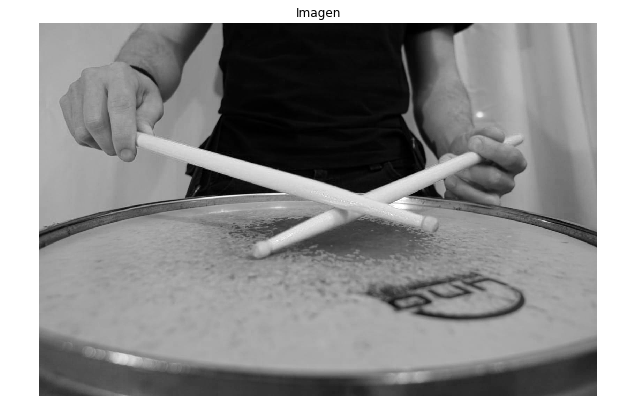

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from scipy import signal
from scipy import misc
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

import math
import pdb
import os
import cv2
import skimage
import imutils


# Esto cambia si las figuras quedan en línea en el notebook o se abren ventanas 
# aparte. 
%matplotlib inline
#%matplotlib

# Algunos parámetros para controlar en general el aspecto de las figuras
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray' #colormap por defecto


#Importar imagenes
# Elegir y abrir imagen
filenames = ['./imagenes/WhatsApp Image 2019-06-19 at 7.08.32 PM.jpeg','./imagenes/lena.bmp','./imagenes/blurred_noisy_car.png','./imagenes/baboon.tiff','./imagenes/peppers.tiff']
I = imread(filenames[0])[:,:,0]
plt.figure()
plt.title('Imagen')
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
#PRUEBA CON LSD

I = cv2.imread("./imagenes/WhatsApp Image 2019-06-19 at 7.08.32 PM.jpeg", cv2.IMREAD_GRAYSCALE) 
#Creo LSD
lsd = cv2.createLineSegmentDetector(0)

#Detecto lineas en la imagen
lines = lsd.detect(bordes)[0]  #Posicion 0 son las lineas detectadas

#Dibujo las lineas sobre la imagen
imgdibujada = lsd.drawSegments(I,lines)
#gris=cv2.cvtColor(imgdibujada, cv2.COLOR_BGR2GRAY)

#dibujar lineas sobre fondo negro
fondo=np.zeros(I.shape,np.uint8)
lineassobrefondo=lsd.drawSegments(fondo,lines)


#ploteo
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(121)
plt.title('Deteccion de rectas con LSD')
plt.axis('off')
plt.imshow(lineassobrefondo)
plt.subplot(122)
plt.title('Imagen con lineas superpuestas')
plt.axis('off')
plt.imshow(imgdibujada)
plt.show()

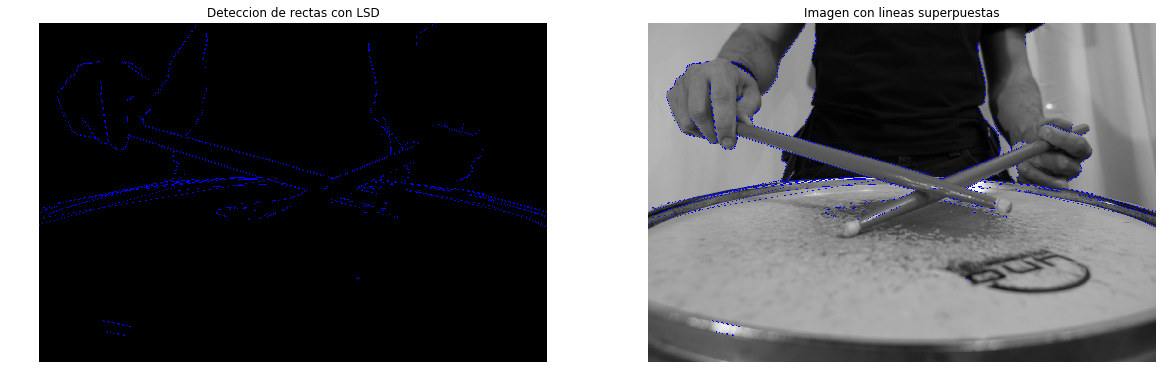

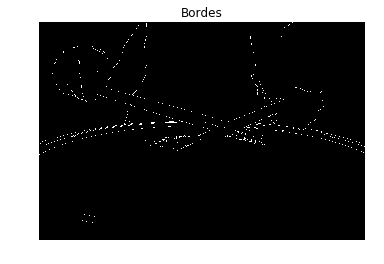

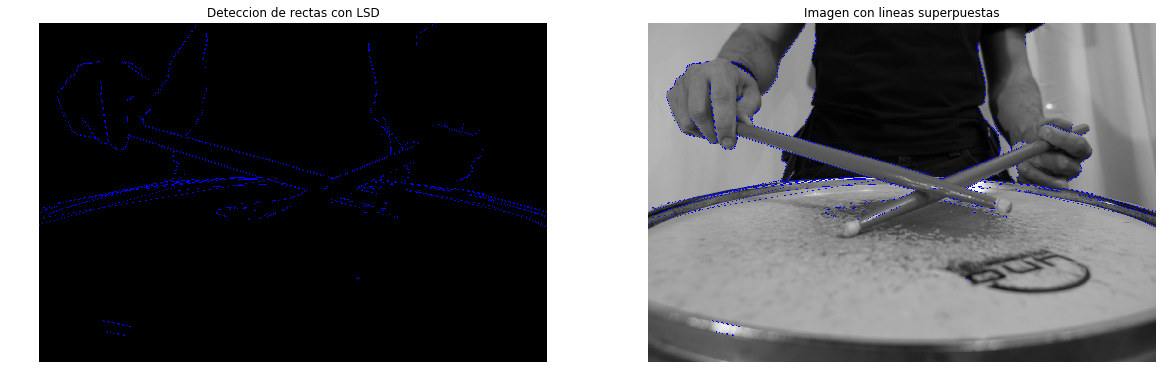

In [6]:
#PRUEBA CON DETECCION DE BORDES Y LUEGO LSD

#Puede ser de utilidad hacer un filtro de canny previo a Hough
bordes=cv2.Canny(I,100,200)
plt.figure()
plt.title('Bordes')
plt.axis('off')
plt.imshow(bordes)
plt.show()

#Creo LSD
lsd = cv2.createLineSegmentDetector(0)

#Detecto lineas en la imagen
lines = lsd.detect(bordes)[0]  #Posicion 0 son las lineas detectadas

#Dibujo las lineas sobre la imagen
imgdibujada = lsd.drawSegments(I,lines)
#gris=cv2.cvtColor(imgdibujada, cv2.COLOR_BGR2GRAY)

#dibujar lineas sobre fondo negro
fondo=np.zeros(I.shape,np.uint8)
lineassobrefondo=lsd.drawSegments(fondo,lines)


#ploteo
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(121)
plt.title('Deteccion de rectas con LSD')
plt.axis('off')
plt.imshow(lineassobrefondo)
plt.subplot(122)
plt.title('Imagen con lineas superpuestas')
plt.axis('off')
plt.imshow(imgdibujada)
plt.show()

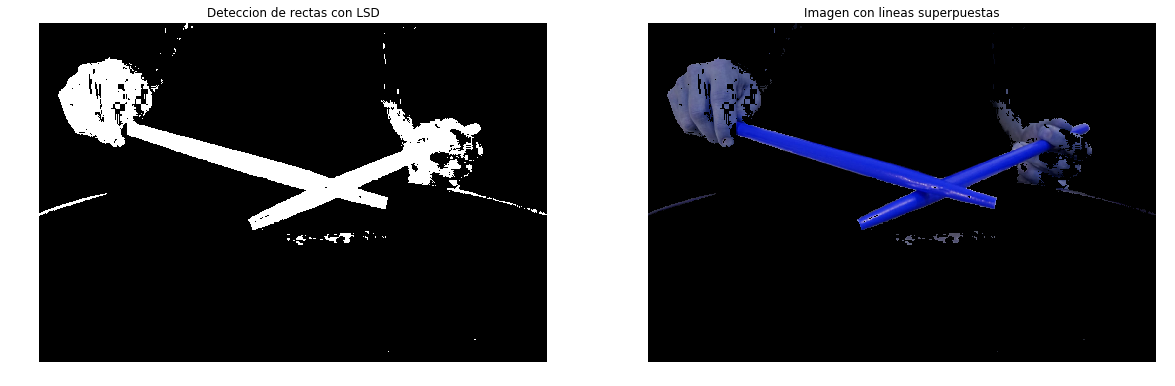

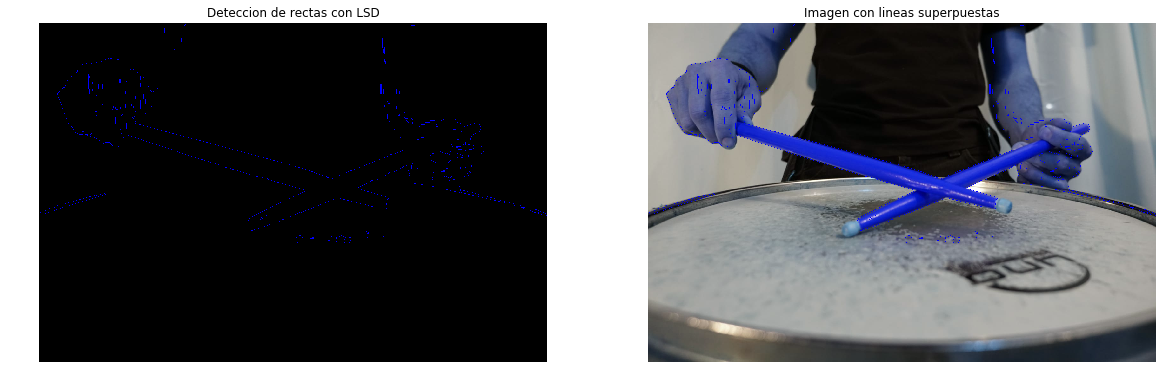

In [4]:
#ENMASCARADO DE ROJO

I = cv2.imread("./imagenes/WhatsApp Image 2019-06-19 at 7.08.32 PM.jpeg")
I_hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

## Gen lower mask (0-5) and upper mask (175-180) of RED
mask1 = cv2.inRange(I_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(I_hsv, (175,50,20), (180,255,255))

## Merge the mask and crop the red regions
mask = cv2.bitwise_or(mask1, mask2 )
croped = cv2.bitwise_and(I, I, mask=mask)

#ploteo
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(121)
plt.title('Deteccion de rectas con LSD')
plt.axis('off')
plt.imshow(mask)
plt.subplot(122)
plt.title('Imagen con lineas superpuestas')
plt.axis('off')
plt.imshow(croped)
plt.show()

#Creo LSD
lsd = cv2.createLineSegmentDetector(0)

#Detecto lineas en la imagen
lines = lsd.detect(mask)[0]  #Posicion 0 son las lineas detectadas

#Dibujo las lineas sobre la imagen
imgdibujada = lsd.drawSegments(I,lines)
#gris=cv2.cvtColor(imgdibujada, cv2.COLOR_BGR2GRAY)

#dibujar lineas sobre fondo negro
fondo=np.zeros(I.shape,np.uint8)
lineassobrefondo=lsd.drawSegments(fondo,lines)


#ploteo
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(121)
plt.title('Deteccion de rectas con LSD')
plt.axis('off')
plt.imshow(lineassobrefondo)
plt.subplot(122)
plt.title('Imagen con lineas superpuestas')
plt.axis('off')
plt.imshow(imgdibujada)
plt.show()